In [136]:
%matplotlib inline

In [137]:
#Pyber Homework

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# create the pathways for the files to be read
city_data_csv = "~/Desktop/Pyber/data/city_data.csv"
ride_data_csv = "~/Desktop/Pyber/data/ride_data.csv"

In [138]:
#read and label the data sets
city_data_df = pd.read_csv(city_data_csv)
ride_data_df = pd.read_csv(ride_data_csv)


In [139]:
#combine/merge the two datasets
Pyber_data = pd.merge(ride_data_df, city_data_df, on ="city", how="left")

Pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [140]:
# Obtain the x and y coordinates for each of the three city types
urban = Pyber_data[Pyber_data["type"]=="Urban"].groupby([Pyber_data["city"]])
suburban = Pyber_data[Pyber_data["type"]=="Suburban"].groupby([Pyber_data["city"]])
rural = Pyber_data[Pyber_data["type"]=="Rural"].groupby([Pyber_data["city"]])
                                           
urban_fare = urban["fare"].mean()
suburban_fare = suburban["fare"].mean()
rural_fare = rural["fare"].mean()
                   
urban_ride = urban["ride_id"].count()
suburban_ride = suburban["ride_id"].count()
rural_ride = rural["ride_id"].count()
                   
urban_driver = urban["driver_count"].mean()
suburban_driver = suburban["driver_count"].mean()
rural_driver = rural["driver_count"].mean()
                   

#urban = Pyber_data.loc[Pyber_data['type']=='Urban']
#suburban = Pyber_data.loc[Pyber_data['type']=='Suburban']
#rural = Pyber_data.loc[Pyber_data['type']=='Rural']


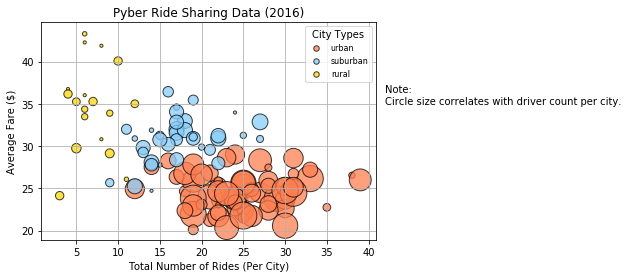

In [141]:
# Build the scatter plots for each city types
plt.scatter(urban_ride, urban_fare, label="urban", s=urban_driver * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o" )
plt.scatter(suburban_ride, suburban_fare, label="suburban", s=suburban_driver * 10, color=["lightskyblue"], edgecolor="black", alpha=0.75, marker="o")
plt.scatter(rural_ride, rural_fare, label="rural", s=rural_driver * 10, color=["gold"], edgecolor="black", alpha=0.75, marker="o")

# Add the background
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend=plt.legend(fontsize = 8, title="City Types", loc="best")

# Equal the size of all markers on the legend
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Add text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
#plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

plt.show()

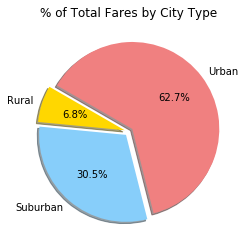

In [142]:
# filter down the data
city_type = Pyber_data.groupby(["type"])
fare_total = city_type["fare"].sum()

# create shortcuts for the graph
labels=["Rural", "Suburban", "Urban"]
explode=(0.05, 0.05, 0.05)
colors=["gold", "lightskyblue", "lightcoral"]

#create the graph
plt.pie(fare_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

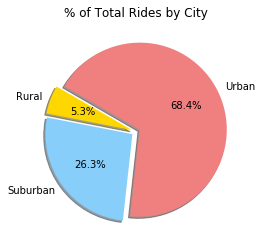

In [143]:
rides_total = city_type["ride_id"].count()

plt.pie(rides_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City")

plt.show()

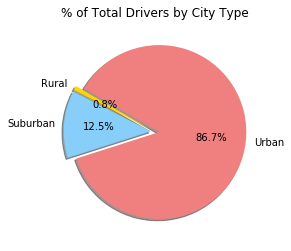

In [144]:
drivers_total = city_type["driver_count"].sum()

plt.pie(drivers_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.show()